In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer

# 

# 1 特征中含有字符串的时候（当成类别），如何做特征抽取

In [5]:

def dictvec():
    """
    字典数据抽取
    :return: None
    """
    # 实例化
    # sparse改为True,输出的是每个不为零位置的坐标，稀疏矩阵可以节省存储空间
    #矩阵中存在大量的0，sparse存储只记录非零位置，节省空间的作用
    #Vectorizer中文含义是矢量器的含义
    dict1 = DictVectorizer(sparse=False)  # sparse=True表示输出的是稀疏矩阵
    
    #每个样本都是一个字典，有三个样本
    # 调用fit_transform，fit方法是训练，transform方法是转换
    #fit的作用是训练，将字典中的类别数据转换成特征
    #transform方法是将字典转换成特征向量
    # 字典中的类别数据，会被转换成特征
    data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                                {'city': '上海', 'temperature': 60},
                                {'city': '深圳', 'temperature': 30}])
    print(data)
    print('-' * 50)
    # 字典中的一些类别数据，分别进行转换成特征
    print(dict1.get_feature_names_out()) # 输出每个特征的名称
    print('-' * 50)
    print(dict1.inverse_transform(data))  # 输出每个特征的名称对应的类别数据

    return None


dictvec()

[[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(60.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


# 2 一段英文文本如何变为数值类型

In [4]:

def couvec():
    # 实例化CountVectorizer
    # max_df, min_df整数：指每个词的所有文档词频数不小于最小值，出现该词的文档数目小于等于max_df
    # max_df, min_df小数(0-1之间的）：某个词的出现的次数／所有文档数量
    # min_df=2
    # 默认会去除单个字母的单词，默认认为这个词对整个样本没有影响,认为其没有语义
    vector = CountVectorizer(min_df=2) # min_df=2表示某个词的出现的次数／所有文档数量

    # 调用fit_transform输入并转换数据

    res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])

    # 打印结果,把每个词都分离了
    print(vector.get_feature_names_out())
    print('-' * 50)
    print(res)
    print('-' * 50)
    print(type(res))
    # 对照feature_names，标记每个词出现的次数
    print('-' * 50)
    print(res.toarray())  #稀疏矩阵转换为数组
    print('-' * 50)
    #拿每个样本里的特征进行显示
    print(vector.inverse_transform(res))


couvec()

['is' 'life' 'python' 'short']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[1 2 1 1]
 [1 1 1 0]
 [1 1 0 1]]
--------------------------------------------------
[array(['life', 'is', 'short', 'python'], dtype='<U6'), array(['life', 'is', 'python'], dtype='<U6'), array(['life', 'is', 'short'], dtype='<U6')]


# 一段汉字文本如何数值化，对于汉字不能用空格来分割

In [6]:

def countvec():
    """
    对文本进行特征值化,单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    cv = CountVectorizer()

    data = cv.fit_transform(["人生苦短，我喜欢 python python", "人生漫长，不用 python"])

    print(cv.get_feature_names_out())
    print('-' * 50)
    print(data)  #稀疏存储，只记录非零位置
    print('-' * 50)
    print(data.toarray())

    return None


countvec()

['python' '不用' '人生漫长' '人生苦短' '我喜欢']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


## 1.3 掌握如何对中文进行分词

In [7]:

def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("一切都像刚睡醒的样子，欣欣然张开了眼。山朗润起来了，水涨起来了，太阳的脸红起来了。")

    con2 = jieba.cut("小草偷偷地从土里钻出来，嫩嫩的，绿绿的。园子里，田野里，瞧去，一大片一大片满是的。坐着，躺着，打两个滚，踢几脚球，赛几趟跑，捉几回迷藏。风轻悄悄的，草软绵绵的。")

    con3 = jieba.cut(
        "桃树、杏树、梨树，你不让我，我不让你，都开满了花赶趟儿。红的像火，粉的像霞，白的像雪。花里带着甜味儿；闭了眼，树上仿佛已经满是桃儿、杏儿、梨儿。花下成千成百的蜜蜂嗡嗡地闹着，大小的蝴蝶飞来飞去。野花遍地是：杂样儿，有名字的，没名字的，散在草丛里，像眼睛，像星星，还眨呀眨的。")

    # 转换成列表
    print(type(con1))
    print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    print(content1)
    print(content2)
    print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    print('-' * 50)
    #join方法把列表中的元素用空格隔开,返回一个字符串
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3


def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword()  #jieba分词好的中文文本
    print('-' * 50)
    print(c1)  #把分词好的文本打印出来
    print(c2)
    print(c3)
    print('-' * 50)

    cv = CountVectorizer()

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())  #把处理好后的特征名称打印出来

    print(data.toarray())

    return None


# cutword()
hanzivec()

Building prefix dict from the default dictionary ...


<class 'generator'>
--------------------------------------------------


Dumping model to file cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.686 seconds.
Prefix dict has been built successfully.


['一切', '都', '像', '刚', '睡醒', '的', '样子', '，', '欣欣然', '张开', '了', '眼', '。', '山朗润', '起来', '了', '，', '水', '涨起来', '了', '，', '太阳', '的', '脸红', '起来', '了', '。']
['小草', '偷偷地', '从', '土里', '钻出来', '，', '嫩嫩的', '，', '绿绿的', '。', '园子', '里', '，', '田野', '里', '，', '瞧', '去', '，', '一', '大片', '一', '大片', '满是', '的', '。', '坐', '着', '，', '躺', '着', '，', '打', '两个', '滚', '，', '踢', '几脚', '球', '，', '赛', '几趟', '跑', '，', '捉', '几回', '迷藏', '。', '风轻', '悄悄的', '，', '草', '软绵绵', '的', '。']
['桃树', '、', '杏树', '、', '梨树', '，', '你', '不让', '我', '，', '我', '不让', '你', '，', '都', '开满', '了', '花', '赶趟儿', '。', '红', '的', '像', '火', '，', '粉', '的', '像霞', '，', '白', '的', '像', '雪', '。', '花里', '带', '着', '甜味', '儿', '；', '闭', '了', '眼', '，', '树上', '仿佛', '已经', '满是', '桃儿', '、', '杏儿', '、', '梨儿', '。', '花', '下', '成千成百', '的', '蜜蜂', '嗡嗡地', '闹', '着', '，', '大小', '的', '蝴蝶', '飞来飞去', '。', '野花', '遍地', '是', '：', '杂', '样儿', '，', '有', '名字', '的', '，', '没', '名字', '的', '，', '散', '在', '草丛里', '，', '像', '眼睛', '，', '像', '星星', '，', '还', '眨', '呀', '眨', '的', '。']
---------------

# 1.4 tf-idf

In [8]:
# 规范{'l1'，'l2'}，默认='l2'
# 每个输出行都有单位范数，或者：
#
# 'l2'：向量元素的平方和为 1。当应用 l2 范数时，两个向量之间的余弦相似度是它们的点积。
#
# 'l1'：向量元素的绝对值之和为 1。参见preprocessing.normalize。

# smooth_idf布尔值，默认 = True
# 通过在文档频率上加一来平滑 idf 权重，就好像看到一个额外的文档包含集合中的每个术语恰好一次。防止零分裂。
# 比如训练集中有某个词，测试集中没有，就是生僻词，就会造成n(x)分母为零，log(n/n(x)),从而出现零分裂

def tfidfvec():
    """
    中文特征值化,计算tfidf值
    :return: None
    """
    c1, c2, c3 = cutword()

    print(c1, c2, c3)
    # print(type([c1, c2, c3]))
    tf = TfidfVectorizer(smooth_idf=True) # smooth_idf=True平滑idf权重

    data = tf.fit_transform([c1, c2, c3])

    print(tf.get_feature_names_out())
    print('-' * 50)
    print(type(data))
    print('-' * 50)
    print(data.toarray())

    return None


tfidfvec()

<class 'generator'>
--------------------------------------------------
['一切', '都', '像', '刚', '睡醒', '的', '样子', '，', '欣欣然', '张开', '了', '眼', '。', '山朗润', '起来', '了', '，', '水', '涨起来', '了', '，', '太阳', '的', '脸红', '起来', '了', '。']
['小草', '偷偷地', '从', '土里', '钻出来', '，', '嫩嫩的', '，', '绿绿的', '。', '园子', '里', '，', '田野', '里', '，', '瞧', '去', '，', '一', '大片', '一', '大片', '满是', '的', '。', '坐', '着', '，', '躺', '着', '，', '打', '两个', '滚', '，', '踢', '几脚', '球', '，', '赛', '几趟', '跑', '，', '捉', '几回', '迷藏', '。', '风轻', '悄悄的', '，', '草', '软绵绵', '的', '。']
['桃树', '、', '杏树', '、', '梨树', '，', '你', '不让', '我', '，', '我', '不让', '你', '，', '都', '开满', '了', '花', '赶趟儿', '。', '红', '的', '像', '火', '，', '粉', '的', '像霞', '，', '白', '的', '像', '雪', '。', '花里', '带', '着', '甜味', '儿', '；', '闭', '了', '眼', '，', '树上', '仿佛', '已经', '满是', '桃儿', '、', '杏儿', '、', '梨儿', '。', '花', '下', '成千成百', '的', '蜜蜂', '嗡嗡地', '闹', '着', '，', '大小', '的', '蝴蝶', '飞来飞去', '。', '野花', '遍地', '是', '：', '杂', '样儿', '，', '有', '名字', '的', '，', '没', '名字', '的', '，', '散', '在', '草丛里', '，', '像', '

# 2 特征处理，不同的特征拉到到同一个量纲

### 归一化

In [9]:
def mm():
    """
    归一化处理
    :return: NOne
    """
    # 归一化缺点 容易受极值的影响
    #feature_range代表特征值范围，一般设置为(0,1),或者(-1,1),默认是(0,1)
    mm = MinMaxScaler(feature_range=(0, 1))

    data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])

    print(data)
    print('-' * 50)
    out = mm.transform([[1, 2, 3, 4], [6, 5, 8, 7]])
    print(out)
    return None
    #transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值


mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


### 标准化

In [10]:
def stand():
    """
    标准化缩放，不是标准正太分布，只均值为0，方差为1的分布
    :return:
    """
    std = StandardScaler()

    data = std.fit_transform([[1., -1., 3.],
                              [2., 4., 2.],
                              [4., 6., -1.]])

    print(data)
    print('-' * 50)
    print(std.mean_) # 均值
    print('-' * 50)
    print(std.var_)  #方差
    print(std.n_samples_seen_)  # 样本数
    return data


data = stand()
type(data)

[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


numpy.ndarray

## transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值,不会重新计算均值方差

# 3 缺失值处理


In [11]:
#下面是填补，针对删除，可以用pd和np
def im():
    """
    缺失值处理
    :return:None
    """
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    #mean, median, most_frequent(众数), constant
    # SimmpleImputer的作用是用其他值来填补缺失值，可以用mean, median, most_frequent(众数), constant等方式
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)

    return None


im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


# 过滤式特征选择

### 方差选择

In [12]:
def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)
    print('-' * 50)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None


var()


[[2 0]
 [1 4]
 [1 1]]
--------------------------------------------------
The surport is [1 2]


### 主成分分析

In [13]:
def pca():
    """
    主成分分析进行特征降维
    :return: None
    """
    # n_ components:小数 0~1 90% 业界选择 90~95%

    # 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
    # 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

    # n_components如果是整数   减少到的特征数量
    # 原始数据方差
    original_value = np.array([[2, 8, 4, 5],
                               [6, 3, 0, 8],
                               [5, 4, 9, 1]])
    print(np.var(original_value, axis=0).sum())  #最初数据每一列的方差，求和
    print('-' * 50)
    pca = PCA(n_components=0.99)

    data = pca.fit_transform(original_value)

    print(data)
    print(type(data))
    #计算data的方差和
    print(np.var(data, axis=0).sum())
    print('-' * 50)
    print(pca.explained_variance_ratio_)
    # 计算data的方差占总方差的比例
    print(pca.explained_variance_ratio_.sum())

    return None


pca()

29.333333333333336
--------------------------------------------------
[[-1.28620952e-15  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333332
--------------------------------------------------
[0.75 0.25]
1.0


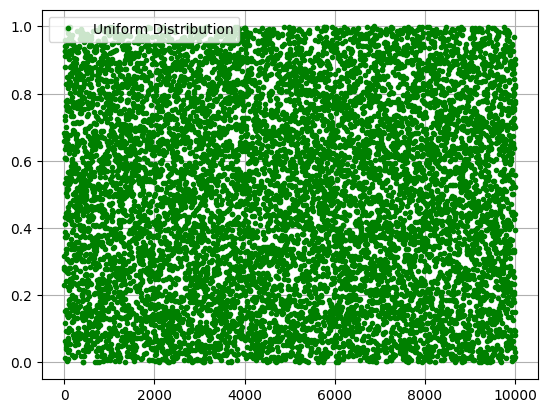

In [14]:
from matplotlib import pyplot as plt

x = np.random.rand(10000)  #每个的概率
t = np.arange(len(x))
plt.plot(t, x, 'g.', label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()